# Making an First Project of Machine learning from the bootcamp of Machine learning from dio in colaboration with Bairesdev

In [20]:
# Importing the libraries
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


In [21]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=64)


valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, shuffle=True, batch_size=64)

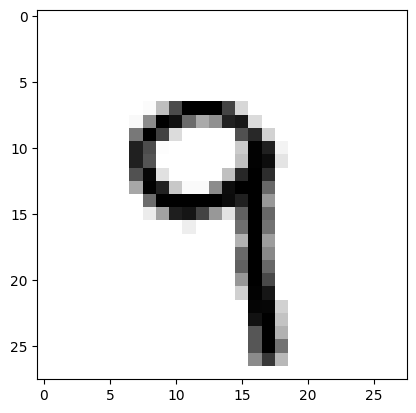

In [22]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [23]:
print(imagens[0].shape)# Check the dimensions of the tensor of each image
print(etiquetas[0].shape) # Check the dimensions of the labels


torch.Size([1, 28, 28])
torch.Size([])


# Building the Structure of Neural Networks

In [24]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128) # Input layer, 784 neurons that connect to 128
    self.linear2 = nn.Linear(128, 64) # internal layer 1, 128 neurons that connect to 64
    self.linear3 = nn.Linear(64, 10) # Internal layer 2, 64 neurons that connect to 10

  def forward(self,X):
    X = F.relu(self.linear1(X)) # Function activation for the entrance layer for the Internal layer 1
    X = F.relu(self.linear2(X)) # Function activation for the Internal Layer 2
    X = self.linear3(X) # Function activation for the intern layer 2 for the output, that case f(x) = x
    return F.log_softmax(X, dim=1) # Used data to calculate de loss


# Building the Structure of Traing

In [25]:
def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) # Define the polictical atualization of bias and weight
  inicio = time() # Timer for measure the training time

  criterio = nn.NLLLoss() # defining the criterion to calc loss
  EPOCHS = 10 # Number of epochs that the algorithm will do
  modelo.train() # Activate the training for the model

  for epoch in range(EPOCHS):
    perda_acumulada = 0 # Initialize the loss

    for imagens, etiquetas in trainloader:

      imagens = imagens.view(imagens.shape[0], -1)
      otimizador.zero_grad() # Clear the gradient


      output = modelo(imagens.to(device)) # Forward pass
      perda_instantanea = criterio(output, etiquetas.to(device))

      perda_instantanea.backward() # Backward pass
      otimizador.step() # Update the weights

      perda_acumulada += perda_instantanea.item() # Actualization of acumulate loss

  else:
    print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
  print("Tempo de treino (em minutos) :", (time()-inicio)/60)




In [26]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0, 0
  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784)
      with torch.no_grad():
        logps = modelo(img.to(device)) # output the model in algotithm Scale


      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab))
      etiqueta_certa = etiquetas.numpy()[i]
      if (etiqueta_certa == etiqueta_pred):
        conta_corretas += 1
      conta_todas += 1

  print("Total de imagens testadas =", conta_todas)
  print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))

Execute the model


In [27]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)